In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader as data
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
tickerSymbol='AAPL'

tickerData=yf.Ticker(tickerSymbol)

In [9]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=tickerData.history(period='204mo')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-03-17 00:00:00-05:00,1.968211,1.992225,1.948757,1.965476,812042000,0.0,0.0
2006-03-20 00:00:00-05:00,1.982498,1.989793,1.941461,1.945109,605441200,0.0,0.0
2006-03-21 00:00:00-05:00,1.878844,1.955749,1.866077,1.878844,1345366400,0.0,0.0
2006-03-22 00:00:00-05:00,1.889483,1.922616,1.862429,1.874588,1345895600,0.0,0.0
2006-03-23 00:00:00-05:00,1.879147,1.881579,1.811970,1.828688,1427826400,0.0,0.0


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-03-17 00:00:00-05:00,1.968211,1.992225,1.948757,1.965476,812042000,0.0,0.0
1,2006-03-20 00:00:00-05:00,1.982498,1.989793,1.941461,1.945109,605441200,0.0,0.0
2,2006-03-21 00:00:00-05:00,1.878844,1.955749,1.866077,1.878844,1345366400,0.0,0.0
3,2006-03-22 00:00:00-05:00,1.889483,1.922616,1.862429,1.874588,1345895600,0.0,0.0
4,2006-03-23 00:00:00-05:00,1.879147,1.881579,1.811970,1.828688,1427826400,0.0,0.0


In [6]:
df=df.drop(['Date','Dividends','Stock Splits'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.968211,1.992225,1.948757,1.965476,812042000
1,1.982498,1.989793,1.941461,1.945109,605441200
2,1.878844,1.955749,1.866077,1.878844,1345366400
3,1.889483,1.922616,1.862429,1.874588,1345895600
4,1.879147,1.881579,1.811970,1.828688,1427826400


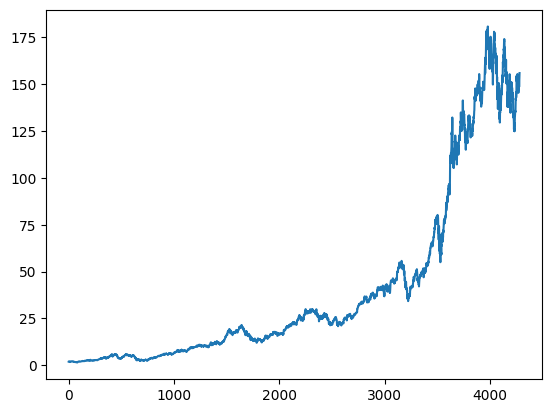

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    143.467158
4275    143.552284
4276    143.645252
4277    143.741124
4278    143.870281
Name: Close, Length: 4279, dtype: float64

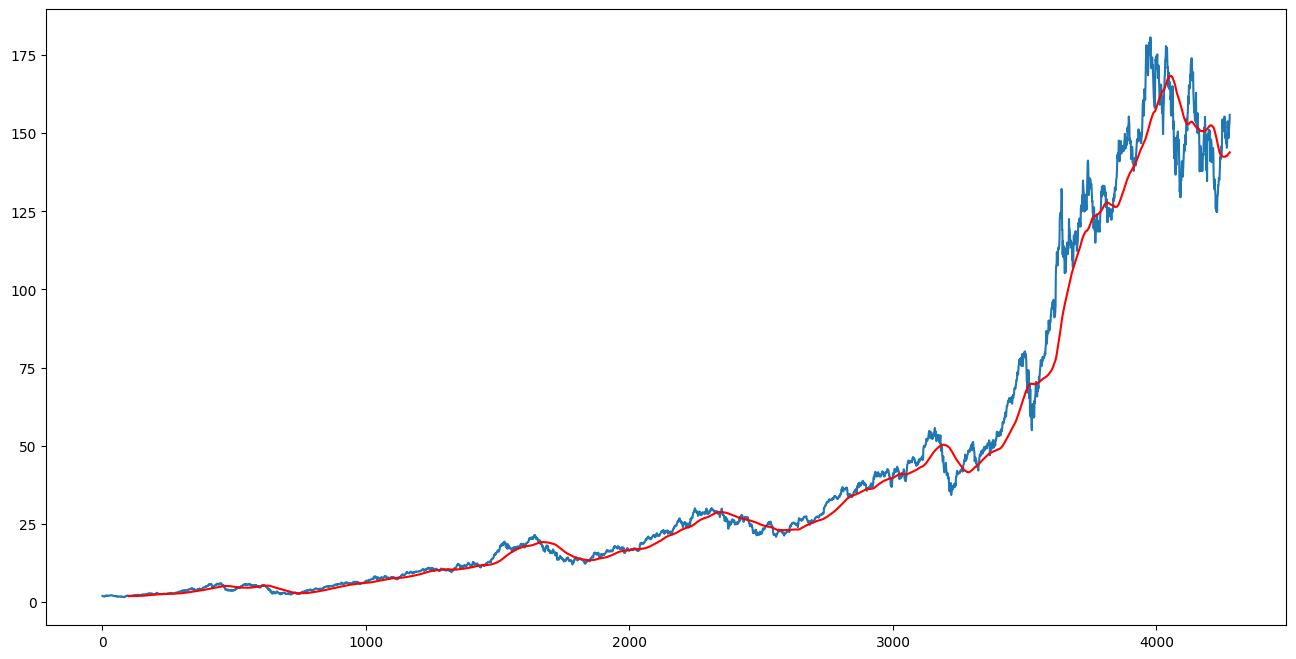

In [27]:
plt.figure(figsize = (16,8))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(16,8))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [36]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

In [38]:
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2995, 1)
(1284, 1)


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01036969],
       [0.00987307],
       [0.00825721],
       ...,
       [0.86820733],
       [0.90606084],
       [0.88586069]])

In [41]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train



array([[[0.01036969],
        [0.00987307],
        [0.00825721],
        ...,
        [0.01306776],
        [0.01225981],
        [0.01045866]],

       [[0.00987307],
        [0.00825721],
        [0.00815345],
        ...,
        [0.01225981],
        [0.01045866],
        [0.00957658]],

       [[0.00825721],
        [0.00815345],
        [0.00703419],
        ...,
        [0.01045866],
        [0.00957658],
        [0.00993237]],

       ...,

       [[0.89016594],
        [0.88318729],
        [0.87528616],
        ...,
        [0.93152798],
        [0.93355396],
        [0.89141706]],

       [[0.88318729],
        [0.87528616],
        [0.88451394],
        ...,
        [0.93355396],
        [0.89141706],
        [0.86820733]],

       [[0.87528616],
        [0.88451394],
        [0.87753548],
        ...,
        [0.89141706],
        [0.86820733],
        [0.90606084]]])

In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow.python.keras import backend as K
from tensorflow.keras.layers import Dense,Dropout,Layer,LSTM



In [43]:
from tensorflow.keras.models import Sequential

In [44]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [46]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
91/91 [==============================] - 25s 275ms/step - loss: 0.0046
Epoch 4/50
91/91 [==============================] - 25s 273ms/step - loss: 0.0045
Epoch 5/50
91/91 [==============================] - 25s 275ms/step - loss: 0.0040
Epoch 6/50
91/91 [==============================] - 25s 277ms/step - loss: 0.0035
Epoch 7/50
91/91 [==============================] - 25s 274ms/step - loss: 0.0039
Epoch 8/50
91/91 [==============================] - 25s 276ms/step - loss: 0.0036
Epoch 9/50
91/91 [==============================] - 25s 273ms/step - loss: 0.0036
Epoch 10/50
91/91 [==============================] - 25s 275ms/step - loss: 0.0034
Epoch 11/50
91/91 [==============================] - 25s 276ms/step - loss: 0.0029
Epoch 12/50
91/91 [==============================] - 25s 274ms/step - loss: 0.0030
Epoch 13/50
91/91 [==============================] - 25s 276ms/step - loss: 0.0030
Epoch 14/50
91/91 [==============================] - 25s 273ms/step - loss: 0.0028
Epoch 15/50

In [ ]:

#import importlib
from importlib import util
tensorflow_found = util.find_spec("tensorflow") is not None
pytorch_found = util.find_spec("torch") is not None
pytorch_ext_found = util.find_spec("intel_extension_for_pytorch") is not None
tensorflow_ext_found = util.find_spec("intel_extension_for_tensorflow") is not None
xgboost_found = util.find_spec("xgboost") is not None
sklearn_found = util.find_spec("sklearn") is not None
sklearnex_found = util.find_spec("sklearnex") is not None
inc_found = util.find_spec("neural_compressor") is not None
modin_found = util.find_spec("modin") is not None
torchccl_found = util.find_spec("oneccl_bindings_for_pytorch") is not None

class arch_checker:

    def __init__(self):
        cpuinfo_found = util.find_spec("cpuinfo") is not None
        if cpuinfo_found == False:
            self.arch = 'None'
            print("please install py-cpuinfo")
            return
        from cpuinfo import get_cpu_info
        info = get_cpu_info()
        flags = info['flags']
        arch_list = ['SPR', 'CPX',"ICX|CLX", "SKX", "BDW|CORE|ATOM"]
        isa_list = [['amx_bf16', 'amx_int8', 'amx_tile'],['avx512_bf16'],['avx512_vnni'],['avx512'],['avx2']]
        index = len(arch_list) - 1
        for flag in flags:
            for idx, isa_sublist in enumerate(isa_list):
                for isa in isa_sublist:
                    if isa in flag:
                        if idx < index:
                            index = idx
        self.arch = arch_list[index]
        return

if tensorflow_found == True:

    import tensorflow as tf

    import os

    def get_mkl_enabled_flag():

        mkl_enabled = False
        major_version = int(tf.__version__.split(".")[0])
        minor_version = int(tf.__version__.split(".")[1])
        if major_version >= 2:
            onednn_enabled = 0
            if minor_version < 5:
                from tensorflow.python import _pywrap_util_port
            else:
                from tensorflow.python.util import _pywrap_util_port
                onednn_enabled = int(os.environ.get('TF_ENABLE_ONEDNN_OPTS', '0'))
            mkl_enabled = _pywrap_util_port.IsMklEnabled() or (onednn_enabled == 1)
        else:
            mkl_enabled = tf.pywrap_tensorflow.IsMklEnabled()
        return mkl_enabled

    print ("TensorTlow version: ", tf.__version__)
    print("MKL enabled :", get_mkl_enabled_flag())
    if tensorflow_ext_found == True:
        import intel_extension_for_tensorflow as itex
        print("itex_version : ", itex.__version__)

if pytorch_found == True:
    import torch
    print("PyTorch Version: ", torch.__version__)
    mkldnn_enabled = torch.backends.mkldnn.is_available()
    mkl_enabled = torch.backends.mkl.is_available()
    openmp_enabled = torch.backends.openmp.is_available()
    print('mkldnn : {0},  mkl : {1}, openmp : {2}'.format(mkldnn_enabled, mkl_enabled, openmp_enabled))
    print(torch.__config__.show())

    if pytorch_ext_found == True:
        import intel_extension_for_pytorch as ipex
        print("ipex_verion : ",ipex.__version__)

if xgboost_found == True:
    import xgboost as xgb
    print("XGBoost Version: ", xgb.__version__)

if modin_found == True:
    import modin
    import modin.config as cfg
    major_version = int(modin.__version__.split(".")[0])
    minor_version = int(modin.__version__.split(".")[1])
    print("Modin Version: ", modin.__version__)
    cfg_engine = ''
    if minor_version > 12 and major_version == 0:
        cfg_engine = cfg.StorageFormat.get()

    else:
        cfg_engine = cfg.Engine.get()
    print("Modin Engine: ", cfg_engine)

if sklearn_found == True:
    import sklearn
    print("scikit learn Version: ", sklearn.__version__)
    if sklearnex_found == True:
        import sklearnex
        print("have scikit learn ext 2021.4 : ", sklearnex._utils.get_sklearnex_version((2021, 'P', 400)))

if inc_found == True:
    import neural_compressor as inc
    print("neural_compressor version {}".format(inc.__version__))

if torchccl_found == True:
    import oneccl_bindings_for_pytorch as torchccl
    print("oneCCL Bindings version {}".format(torchccl.__version__))


checker = arch_checker()
print("Arch : ", checker.arch)

TensorTlow version:  2.11.0
MKL enabled : True


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBoost Version:  1.6.0-dev
scikit learn Version:  1.1.1
have scikit learn ext 2021.4 :  True
please install py-cpuinfo
Arch :  None


In [48]:
model.save('keras_model.h5')

In [49]:
past_100_days=data_training.tail(100)

In [50]:
final_df=past_100_days.append(data_testing,ignore_index=True)

/home/u188371/tmp/ipykernel_3335953/3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [51]:
x_test=[]
y_test=[]


In [52]:
input_data=scaler.fit_transform(final_df)

In [53]:
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [54]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1284, 100, 1)
(1284,)


In [55]:
y_predicted=model.predict(x_test)
y_predicted.shape

41/41 [==============================] - 4s 82ms/step


(1284, 1)

In [56]:
scaler.scale_

array([0.00682936])

In [57]:
scale_factor=1/0.00682936
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

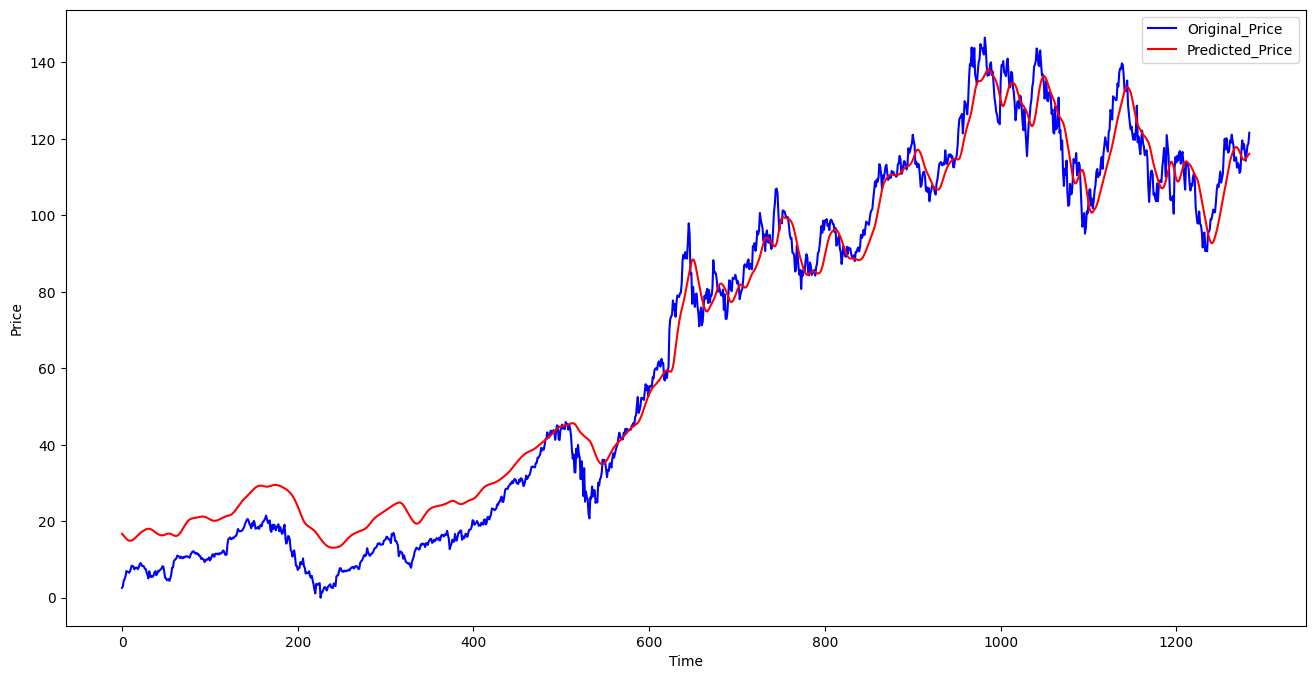

In [58]:
plt.figure(figsize=(16,8))
plt.plot(y_test,'b',label='Original_Price' )
plt.plot(y_predicted,'r',label='Predicted_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 3.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import streamlit as 